<h1><center>Trabajo Práctico de simulación 2</center></h1>
<hr width=50%>
<h1><center>Estimación Espectral</center></h1>

|          Nombre         | Padrón |    Correo electrónico    |
|:-----------------------:|:------:|:------------------------:|
| Facundo Agustín Demarco | 100620 |    fdemarco@fi.uba.ar    |
|      Leonel Mendoza     | 101153 |    lmendoza@fi.uba.ar    |
|     Francisco Rossi     |  99540 |     frrossi@fi.uba.ar    |

***

In [1]:
#importamos las librerias que utilizaremos a lo largo del tp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import scipy as sp
import scipy.signal as sig

In [2]:
#Ejercicio 1 cell 1/2

N = int(10e3)

W = np.random.randn(N + 1) # generamos 10001 muestras, de manera de simplificar el codigo subsiguiente

#Estimador insesgado de la autocorrelacion (como media nula, es de la autocovarianza)

def r_insesgado(k,N):

    suma = 0
    n = k + 1

    while (k + 1 <= n <= N):
        suma += W[n] * W[n-k]
        n += 1

    suma = suma / (N-k)

    return suma

R_insesgado = np.zeros(N, dtype=float)
R_sesgado = np.zeros(N, dtype=float)
#generamos los estimadores para k mayores iguales que 0
for k in range(N):
    R_insesgado[k]= r_insesgado(k,N)
    R_sesgado[k]  = R_insesgado[k]*(N-k)/N
    
k = np.arange(-(N-1),N)

# espejamos los estimadores dado que la autocorrelación es par.
def mirror(vector):
    l = len(vector)
    vector_r = np.zeros(l-1)

    for i in range(l-2):
        vector_r[i] = vector[l-1-i]

    return np.append(vector_r,vector)

R_teorico = np.zeros(2*N-1)
R_teorico[N] = 1

R_insesgado_plot = mirror(R_insesgado)
R_sesgado_plot = mirror(R_sesgado)

<Figure size 1440x720 with 0 Axes>

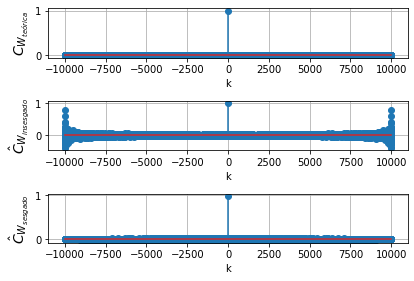

In [3]:
#Ejercicio 1 cell 2/2
#Plots Ejercicio1
plt.figure(figsize=(20,10))
fig, axs = plt.subplots(3, 1)
axs[0].stem(k,R_teorico,use_line_collection=True)
axs[0].grid(which='both')
axs[0].set_xlabel('k')
axs[0].set_ylabel(r'$C_{W_{teórica}}$',fontsize=14)

axs[1].stem(k,R_insesgado_plot,use_line_collection=True)
axs[1].grid(which='both')
axs[1].set_xlabel('k')
axs[1].set_ylabel(r'$\hat{C}_{W_{insesgado}}$',fontsize=14)

axs[2].stem(k,R_sesgado_plot,use_line_collection=True)
axs[2].grid(which='both')
axs[2].set_xlabel('k')
axs[2].set_ylabel(r'$\hat{C}_{W_{sesgado}}$',fontsize=14)

fig.tight_layout()
plt.show()

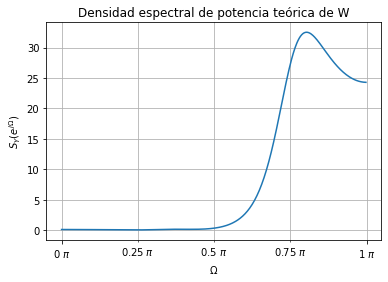

In [4]:
#Ejercicio 2 cell 1/5

#Ejercicio 2.1) Sy TEORICA

w, h = sig.freqz([1,-1.3817,1.5632,-0.8843,0.4096],[1,0.3544,0.3508,0.1736,0.2401])

#Plot ej 2.1
plt.plot(w/np.pi,np.abs(h)**2)
plt.xlabel(r"$\Omega$")
plt.ylabel(r"$S_Y(e^{j\Omega})$")
plt.grid(True, which="both", ls="-")
plt.title("Densidad espectral de potencia teórica de W")

#eje x en fracciones de pi
ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.25))

plt.style.use("ggplot")

plt.show()

In [5]:
#Ejercicio 2 cell 2/5

#Ejercicio 2.2) Periodograma promedio y varianza

#generamos las N muestras del ruido J veces
J = 100

#muestreos de N en vectores columna
W_64 = np.random.randn(64, J)
W_256 = np.random.randn(256, J)
W_512 = np.random.randn(512, J)
#respuestas al filtro en vectores columna
Y_64 = np.zeros((64,J))
Y_256 = np.zeros((256,J))
Y_512 = np.zeros((512,J))
#periodogramas de las respuestas al filtro en vectores columna
Sy_i_64 = np.zeros((int(64/2)+1,J), dtype=complex)
Sy_i_256 = np.zeros((int(256/2)+1,J), dtype=complex)
Sy_i_512= np.zeros((int(512/2)+1,J), dtype=complex)
#periodograma promedio de respuestas al filtro en vectores columna
mean_S64 = np.zeros(int(64/2)+1, dtype=complex)
mean_S256 = np.zeros(int(256/2)+1, dtype=complex)
mean_S512= np.zeros(int(512/2)+1, dtype=complex)
#varianza de los espectrogramas respuestas al filtro en vectores columna
var_S64  = np.zeros(int(64/2)+1, dtype=complex)
var_S256 = np.zeros(int(256/2)+1, dtype=complex)
var_S512 = np.zeros(int(512/2)+1, dtype=complex)

omega_512 = np.arange(-np.pi, np.pi + 2*np.pi/512, 2*np.pi/512)
omega_256 = np.arange(-np.pi, np.pi + 2*np.pi/256, 2*np.pi/256)
omega_64 = np.arange(-np.pi, np.pi + 2*np.pi/64, 2*np.pi/64)

#hayamos la respuesta del filtro a las J muestras

for i in range(J):
    Y_64[:,i] += sig.lfilter([1, -1.3817, 1.5632, -0.8843, 0.4096], [1, 0.3544, 0.3508, 0.1736, 0.2401],W_64[:,i])
    Y_256[:,i] += sig.lfilter([1, -1.3817, 1.5632, -0.8843, 0.4096], [1, 0.3544, 0.3508, 0.1736, 0.2401],W_256[:,i])
    Y_512[:,i] += sig.lfilter([1, -1.3817, 1.5632, -0.8843, 0.4096], [1, 0.3544, 0.3508, 0.1736, 0.2401],W_512[:,i])

#periodogramas de las J muestras

for i in range(J):
    omega_64, aux  = sig.periodogram(Y_64[:,i], fs=200*np.pi, scaling='density')
    Sy_i_64[:,i]  += aux
    omega_256, aux  = sig.periodogram(Y_256[:,i], fs=200*np.pi, scaling='density')
    Sy_i_256[:,i]  += aux
    omega_512, aux = sig.periodogram(Y_512[:,i], fs=200*np.pi, scaling='density')
    Sy_i_512[:,i] += aux

omega_64 /= J
omega_256 /= J
omega_512 /= J

#periodograma promedio
for i in range(J):
    mean_S64 += Sy_i_64[:,i]
    mean_S256 += Sy_i_256[:,i]
    mean_S512+= Sy_i_512[:,i]

mean_S64 /= J
mean_S256 /= J
mean_S512 /= J

#varianza del espectrograma
for i in range(J):
    var_S64 += np.power(Sy_i_64[:,i]-mean_S64,2)
    var_S256 += np.power(Sy_i_256[:,i]-mean_S256,2)
    var_S512+= np.power(Sy_i_512[:,i]-mean_S512,2)

var_S64 = var_S64/(J-1)
var_S256 = var_S256/(J-1)
var_S512 = var_S512/(J-1)

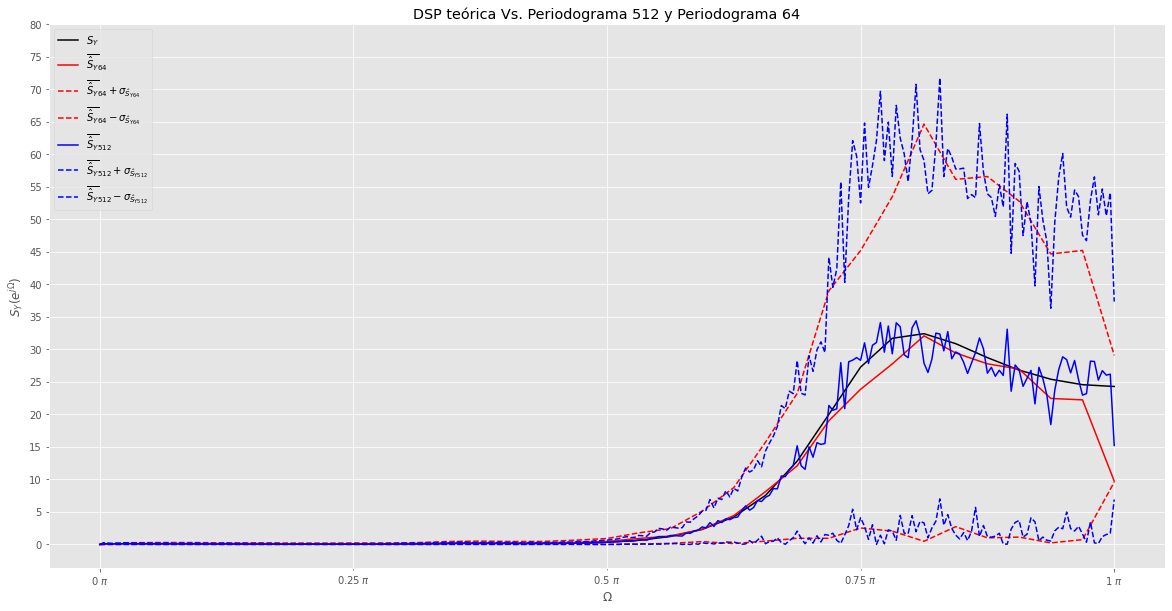

In [6]:
#Ejercicio 2 cell 3/5
#plots ej2.2

#otra forma de obtener la Sy teorica sin simular el filtro para cada vector w
H = lambda z: (1 - 1.3817 * z**(-1)+ 1.5632 * z**(-2) - 0.8843 *z**(-3) + 0.4096 * z **(-4))/(1 + 0.3544 *z**(-1)+ 0.3508 * z**(-2) + 0.1736 *z**(-3) + 0.2401 * z **(-4))

cons = 10*np.pi
step = np.pi/32

w = np.arange(step, np.pi+step, step)

plt.figure(figsize=(20,10))

plt.plot(w/np.pi,np.abs(H(np.exp(w*1j)))**2, 'k')

plt.plot(omega_64/np.pi, 100*np.pi*np.abs(mean_S64), 'r')

plt.plot(omega_64/np.pi, 100*np.pi*np.abs(mean_S64 + np.sqrt(var_S64)),'--r')

plt.plot(omega_64/np.pi, 100*np.pi*np.abs(mean_S64 - np.sqrt(var_S64)),'--r')

plt.plot(omega_512/np.pi, 100*np.pi*np.abs(mean_S512), 'b')

plt.plot(omega_512/np.pi, 100*np.pi*np.abs(mean_S512 + np.sqrt(var_S512)), '--b')

plt.plot(omega_512/np.pi, 100*np.pi*np.abs(mean_S512 - np.sqrt(var_S512)), '--b')


plt.legend([r"$S_Y$", r"$\overline{\hat{S}_Y}_{64}$",r"$\overline{\hat{S}_Y}_{64} + \sigma_{\hat{S}_{Y64}} $",r"$\overline{\hat{S}_Y}_{64} - \sigma_{\hat{S}_{Y64}} $",r"$\overline{\hat{S}_Y}_{512}$",r"$\overline{\hat{S}_Y}_{512} + \sigma_{\hat{S}_{Y512}} $",r"$\overline{\hat{S}_Y}_{512} - \sigma_{\hat{S}_{Y512}} $"])


plt.xlabel(r"$\Omega$")
plt.ylabel(r"$S_Y(e^{j\Omega})$")
plt.grid(True, which="both", ls="-")
plt.title("DSP teórica Vs. Periodograma 512 y Periodograma 64")

plt. yticks(np.arange(0, 85, step=5))

ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.25))

plt.style.use("ggplot")

In [7]:
#Ejercicio 2 cell 4/5

#Ejercicio 2.3) Barlett vs rectangular

#reptetimos el proceso anterior para 256
#generamos las N muestras del ruido J veces
J = 100

#muestreos de N en vectores columna
W_256 = np.random.randn(256, J)
#respuestas al filtro en vectores columna
Y_256 = np.zeros((256,J))
#periodogramas de las respuestas al filtro en vectores columna
Sy_i_256_4= np.zeros((int(256/2),J), dtype=complex)
Sy_i_256_16= np.zeros((int(64/2),J), dtype=complex)
#periodograma promedio de respuestas al filtro en vectores columna
mean_S256_4= np.zeros(int(256/2), dtype=complex)
mean_S256_16= np.zeros(int(64/2), dtype=complex)
#varianza de los espectrogramas respuestas al filtro en vectores columna
var_S256_4 = np.zeros(int(256/2), dtype=complex)
var_S256_16= np.zeros(int(64/2), dtype=complex)

omega_256_4 = np.arange(-np.pi, np.pi + 2*np.pi/256, 2*np.pi/256)
omega_256_16 = np.arange(-np.pi, np.pi + 2*np.pi/256, 2*np.pi/256)

#paso las J muestras por el filtro


for i in range(J):
    Y_256[:,i] += sig.lfilter([1, -1.3817, 1.5632, -0.8843, 0.4096], [1, 0.3544, 0.3508, 0.1736, 0.2401], W_256[:,i])

#periodogramas de las J muestras

# NO ME CIERRA
nfft_4=4*64-1
nfft_16=4*16-1

window_4=np.bartlett(nfft_4)
window_16=np.bartlett(nfft_16)

#period(nfft=2*M1-1)

for i in range(J):
    omega_256_4, aux = sig.periodogram(Y_256[:,i], nfft=nfft_4, fs=200*np.pi, scaling='density', window='bartlett')
    Sy_i_256_4[:,i] += aux
    omega_256_16, aux = sig.periodogram(Y_256[:,i], nfft=nfft_16, fs=200*np.pi, scaling='density', window='bartlett')
    Sy_i_256_16[:,i] += aux

omega_256_4 /= J
omega_256_16 /= J

#periodograma promedio

for i in range(J):
    mean_S256_4+= Sy_i_256_4[:,i]
    mean_S256_16+= Sy_i_256_16[:,i]

mean_S256_4 /= J
mean_S256_16 /= J

#varianza del espectrograma

for i in range(J):
    var_S256_4  += np.power(Sy_i_256_4[:,i]-mean_S256_4, 2)
    var_S256_16 += np.power(Sy_i_256_16[:,i]-mean_S256_16, 2)

var_S256_4  = var_S256_4/(J-1)
var_S256_16 = var_S256_16/(J-1)


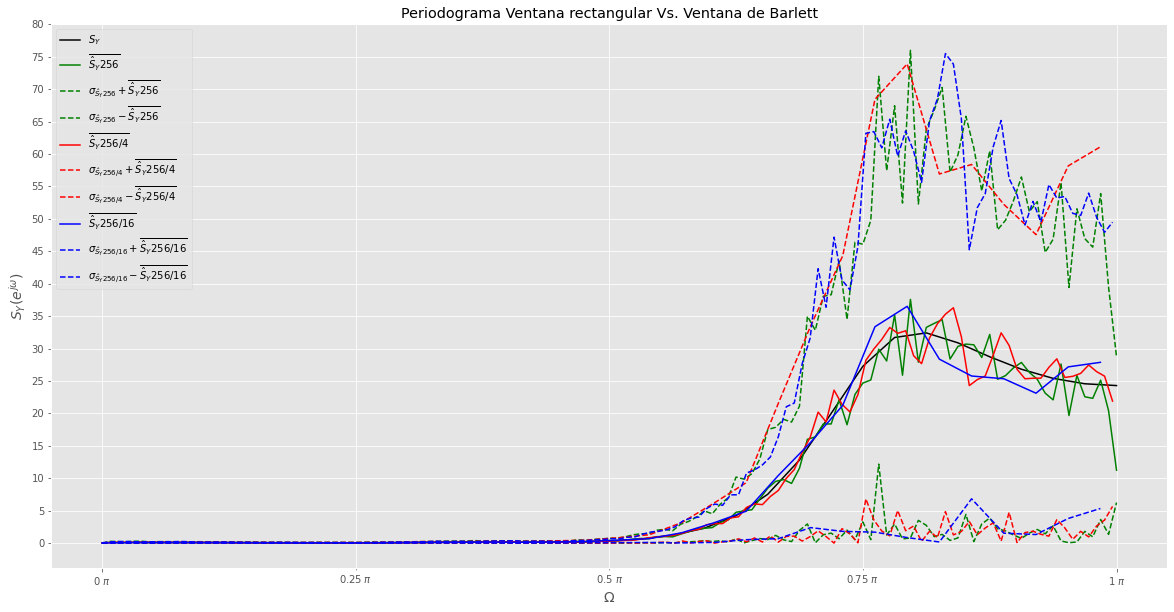

In [8]:
#Ejercicio 2 cell 5/5

cons = 10*np.pi
step = np.pi/32
w = np.arange(step, np.pi+step, step)

plt.figure(figsize=(20,10))

plt.plot(w/np.pi,np.abs(H(np.exp(w*1j)))**2, 'k')

plt.plot(omega_256/np.pi, 100*np.pi*np.abs(mean_S256), 'g')

plt.plot(omega_256/np.pi, 100*np.pi*np.abs(mean_S256 + np.sqrt(var_S256)),'--g')

plt.plot(omega_256/np.pi, 100*np.pi*np.abs(mean_S256 - np.sqrt(var_S256)),'--g')

plt.plot(omega_256_4/np.pi, 100*np.pi*np.abs(mean_S256_4), 'r')

plt.plot(omega_256_16/np.pi, 100*np.pi*np.abs(mean_S256_16 + np.sqrt(var_S256_16)),'--r')

plt.plot(omega_256_4/np.pi, 100*np.pi*np.abs(mean_S256_4 - np.sqrt(var_S256_4)), '--r')

plt.plot(omega_256_16/np.pi, 100*np.pi*np.abs(mean_S256_16), 'b')

plt.plot(omega_256_4/np.pi, 100*np.pi*np.abs(mean_S256_4 + np.sqrt(var_S256_4)), '--b')

plt.plot(omega_256_16/np.pi, 100*np.pi*np.abs(mean_S256_16 - np.sqrt(var_S256_16)), '--b')

plt.xlabel(r"$\Omega$",fontsize=14)
plt.ylabel(r"$S_Y(e^{j\omega})$",fontsize=14)
plt.grid(True, which="both", ls="-")
plt.title("Periodograma Ventana rectangular Vs. Ventana de Barlett")

ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.25))

plt. yticks(np.arange(0, 85, step=5))

plt.style.use("ggplot")
plt.legend([r"$S_Y$", r"$\overline{\hat{S}_Y256}$",r"$\sigma_{\hat{S}_Y256} + \overline{\hat{S}_Y256}$", r"$\sigma_{\hat{S}_Y256} - \overline{\hat{S}_Y256}$",r"$\overline{\hat{S}_Y256/4}$",r"$\sigma_{\hat{S}_Y256/4} + \overline{\hat{S}_Y256/4}$", r"$\sigma_{\hat{S}_Y256/4} - \overline{\hat{S}_Y256/4}$",r"$\overline{\hat{S}_Y256/16}$",r"$\sigma_{\hat{S}_Y256/16} + \overline{\hat{S}_Y256/16}$", r"$\sigma_{\hat{S}_Y256/16} - \overline{\hat{S}_Y256/16}$"])

plt.show()

In [9]:
#Ejercicio 3 cell 1/3

### 3) COMPARACION ENTRE PERIODOGRAMA Y WELCH

#se generan dos muestras de proceso con ecuacion:
# Y(z) (1 + 0.3544 z^-1 + 0.3508 z^-2 + 0.1736 z^-3 + 0.2401 z^-4) = W(z)

H2 = lambda z: 1/(1 + 0.3544 *z**(-1)+ 0.3508 * z**(-2) + 0.1736 *z**(-3) + 0.2401 * z **(-4))
step2 = np.pi/5000
w2 = np.arange(step2, np.pi+step2, step2)

#N 1000 y 5000

N1 = 1000
N5 = 5000

Y_1 = sig.lfilter([1], [1, 0.3544, 0.3508, 0.1736, 0.2401], np.random.randn(N1))
Y_5 = sig.lfilter([1], [1, 0.3544, 0.3508, 0.1736, 0.2401], np.random.randn(N5))

#periodogramas para N1 y N5

w1_p, Sy1_p = sig.periodogram(Y_1, fs=2)
w5_p, Sy5_p = sig.periodogram(Y_5, fs=2)

#welch
w1_w, Sy1_w = sig.welch(Y_1, nperseg=50, noverlap=25, nfft=5000, fs=2)
w5_w, Sy5_w = sig.welch(Y_5, nperseg=250, noverlap=125, nfft=5000, fs=2)


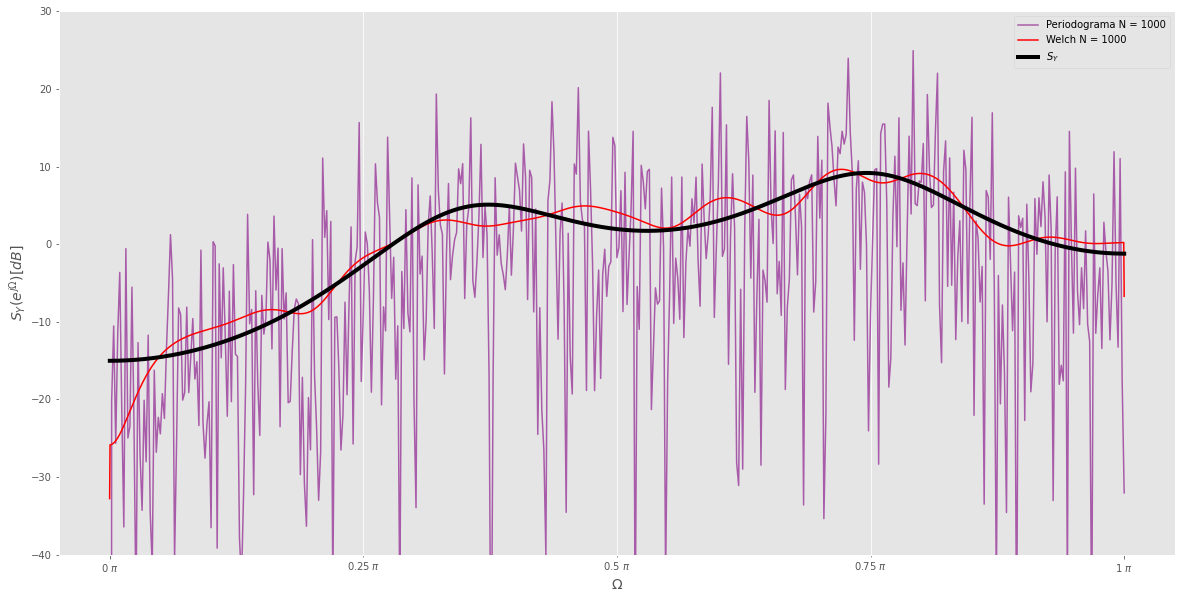

In [10]:
#Ejercicio 3 cell 2/3

# N = 1000
plt.figure(figsize=(20,10))

plt.plot(w1_p, 10*np.log(np.abs(Sy1_p)), color='purple', alpha=0.6)
plt.plot(w1_w, 10*np.log(np.abs(Sy1_w)), color='red')
plt.plot(w2/np.pi,10*np.log(np.abs(H2(np.exp(w2*1j)))**2),  color='black', linewidth=4)
plt.ylim(-40,30)
plt.grid(which='both')
plt.ylabel(r"$S_Y(e^{j\Omega}) [dB]$",fontsize=14)
plt.xlabel(r"$\Omega$",fontsize=14)
plt.legend(["Periodograma N = 1000","Welch N = 1000", r"$S_Y$"])

ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.25))
plt.show()

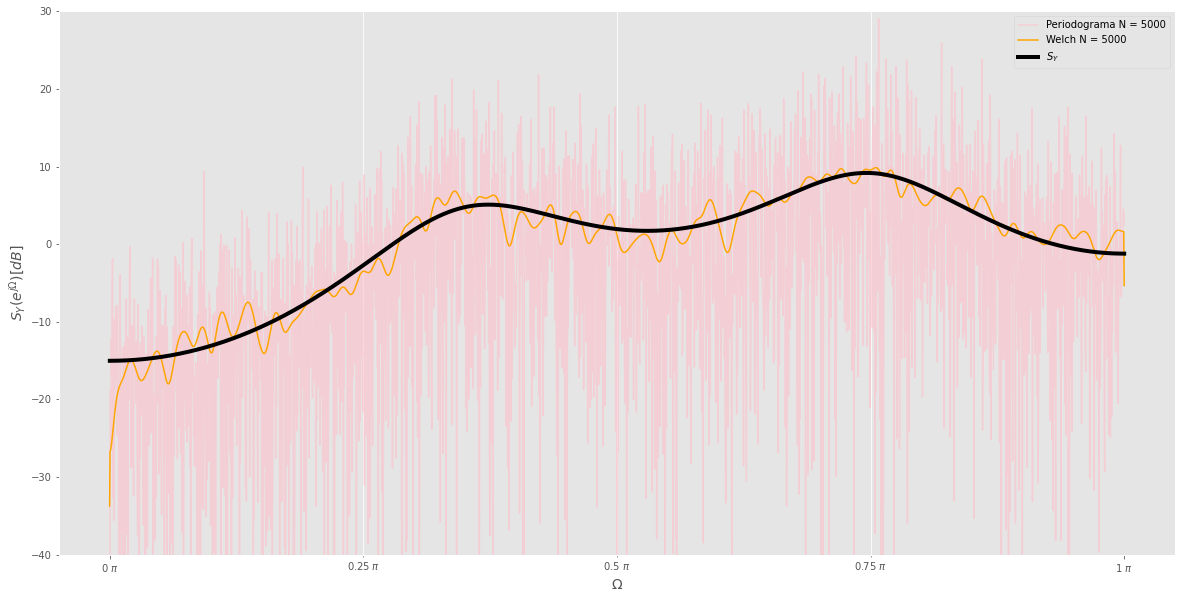

In [11]:
#Ejercicio 3 cell 3/3

# N = 5000
plt.figure(figsize=(20,10))
plt.plot(w5_p, 10*np.log(np.abs(Sy5_p)), color='pink', alpha=0.6)
plt.plot(w5_w, 10*np.log(np.abs(Sy5_w)), color='orange')
plt.plot(w2/np.pi,10*np.log(np.abs(H2(np.exp(w2*1j)))**2),  color='black', linewidth=4)
plt.ylim(-40,30)
plt.grid(which='both')
plt.ylabel(r"$S_Y(e^{j\Omega}) [dB]$",fontsize=14)
plt.xlabel(r"$\Omega$",fontsize=14)
plt.legend(["Periodograma N = 5000","Welch N = 5000", r"$S_Y$"])

ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.25))
plt.show()

In [12]:
#Ejercicio 4 cell 1/4

### 4) Comparación entre el estimador MV y el estimador de Welch

N = 1000

def mirror2(vector):
    l = len(vector)
    vector_r = np.zeros(l)

    for i in range(l):
        vector_r[i] = vector[l-i-1]

    return vector_r

def gen_vec(vector, orden):
    return mirror2(vector[orden:])

#generador de cada fila de la matriz A
def gen_fil(vector,orden,n):
    fil = np.zeros(orden)

    for j in range(orden):
        fil[j] = vector[n-j] #fil[j] = vector[n-j-1]
    return fil

# ya se genera transpuesta
def gen_matrix(vector,orden):
    Ymat = np.zeros([N-orden,orden])
    for i in range(N-orden):
        Ymat[i:] = gen_fil(vector,orden,N-2-i)
    return Ymat

def a_mv(Ymat, yvec):
    (a_est, res, rangoY, sin_val) = np.linalg.lstsq(Ymat, yvec,rcond=None)
    return a_est

def var_mv(a_mv,Ymat,yvec,orden):
    return np.power(np.linalg.norm(yvec-np.dot(Ymat,a_mv)),2)/(N-orden)

def modelo_mv(vector,orden):
    yvec = gen_vec(vector,orden)
    Ymat = gen_matrix(vector,orden)
    a_est = a_mv(Ymat,yvec)
    var_est = var_mv(a_est,Ymat,yvec,orden)
    return a_est,var_est

def obtener_var_mv(orden,vector_var):
    return vector_var[orden-1]

def metrica_akaike(orden,var_mv_orden):
    return ((2*(orden+1)) + 2*N*(1+np.log(2*np.pi*var_mv_orden)))

#generamos las muestras del proceso de salida y el estimador de welch
y = sig.lfilter([1], [1, 0.3544, 0.3508, 0.1736, 0.2401], np.random.randn(N))
w, Sy_welch = sig.welch(y, nperseg=50, noverlap=25, nfft=5000, fs=2)

#matriz de coeficientes (para cada orden)
A_mv = np.zeros([100]).reshape(10,10)
#vector de varianzas (para cada orden)
VAR_mv = np.zeros(10)
for orden in range(1,11):
    A_mv[orden-1,:orden],VAR_mv[orden-1] = modelo_mv(y,orden)

akaike_vec = np.zeros(10)
for orden in range(1,11):
    akaike_vec[orden-1] = metrica_akaike(orden,obtener_var_mv(orden,VAR_mv))

m_akaike = np.where(akaike_vec == np.amin(akaike_vec))[0]+1
print("el orden donde akaike es minimo es:",m_akaike)

minim = np.amin(akaike_vec)

#delta
print(akaike_vec-minim)

el orden donde akaike es minimo es: [5]
[249.28813354 144.39464848 118.12725862   1.45592737   0.
   3.51298448   6.40355608   2.68944804   5.41162012   2.12627217]


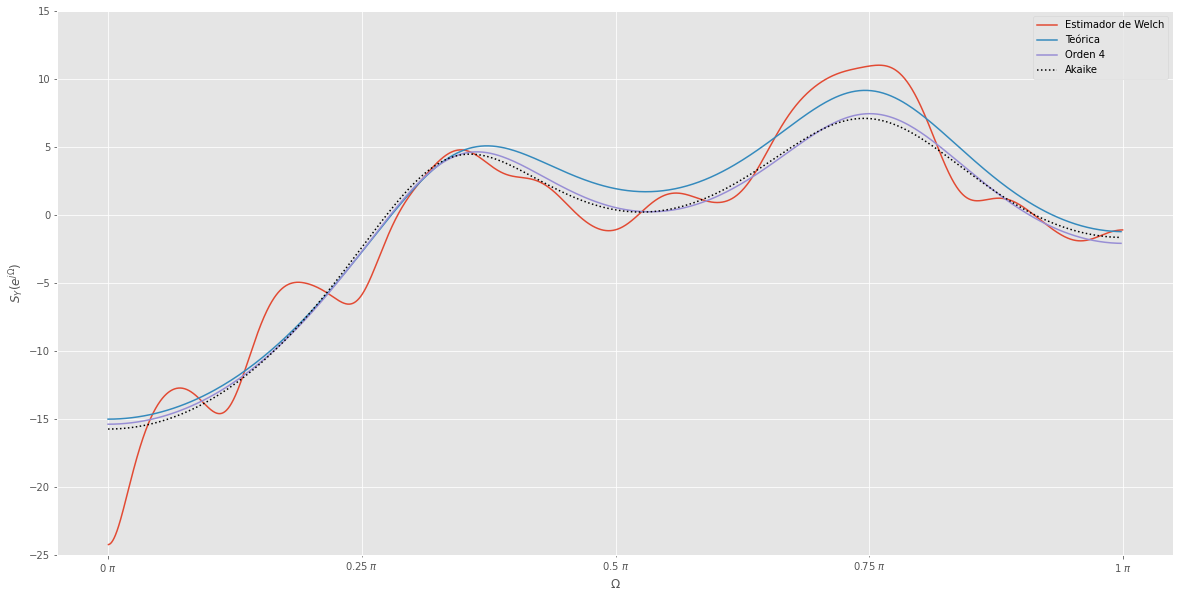

In [13]:
#Ejercicio 4 cell 2/4
#4.3 grafico en dB

y = sig.lfilter([1], [1, 0.3544, 0.3508, 0.1736, 0.2401], np.random.randn(N))
w_welch, Sy_welch = sig.welch(y, nperseg=50, noverlap=25, nfft=5000,fs=2*np.pi)

w_teorica,H_teorica = sig.freqz([1], [1, 0.3544, 0.3508, 0.1736, 0.2401])
w_orden4,H_orden4 = sig.freqz([VAR_mv[3]], np.concatenate(([1],-A_mv[3,:4])))
w_akaike,H_akaike = sig.freqz([VAR_mv[m_akaike-1]], np.concatenate(([1],-A_mv[int(m_akaike)-1,:int(m_akaike)])))

plt.figure(figsize=(20,10))
plt.plot(w_welch[1:len(w_welch)-1]/np.pi,10*np.log(np.pi*np.abs(Sy_welch[1:len(w_welch)-1])))
plt.plot(w_teorica/np.pi,20*np.log(np.abs(H_teorica)))
plt.plot(w_orden4/np.pi,20*np.log(np.abs(H_orden4)))
plt.plot(w_akaike/np.pi,20*np.log(np.abs(H_akaike)), ':k',)
plt.grid(True, which='both', ls='-')
plt.xlabel(r"$\Omega$")
plt.ylabel(r"$S_Y(e^{j\Omega})$")
plt.ylim([-25,15])
plt.legend(["Estimador de Welch", "Teórica", "Orden 4", "Akaike"])

ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.25))
plt.show()



In [14]:
#Ejercicio 4 cell 3/4
#Ejercicio 4.4

N = 1000
K = 2000

ordenes_vec = np.zeros(K)
for i in range (K):

    y = sig.lfilter([1], [1, 0.3544, 0.3508, 0.1736, 0.2401], np.random.randn(N))

    A_mv = np.zeros([100]).reshape(10,10)

    VAR_mv = np.zeros(10)
    for orden in range(1,11):
        A_mv[orden-1,:orden],VAR_mv[orden-1] = modelo_mv(y,orden)

    akaike_vec = np.zeros(10)
    for orden in range(1,11):
        akaike_vec[orden-1] = metrica_akaike(orden,obtener_var_mv(orden,VAR_mv))

    ordenes_vec[i] = np.where(akaike_vec == np.amin(akaike_vec))[0] + 1


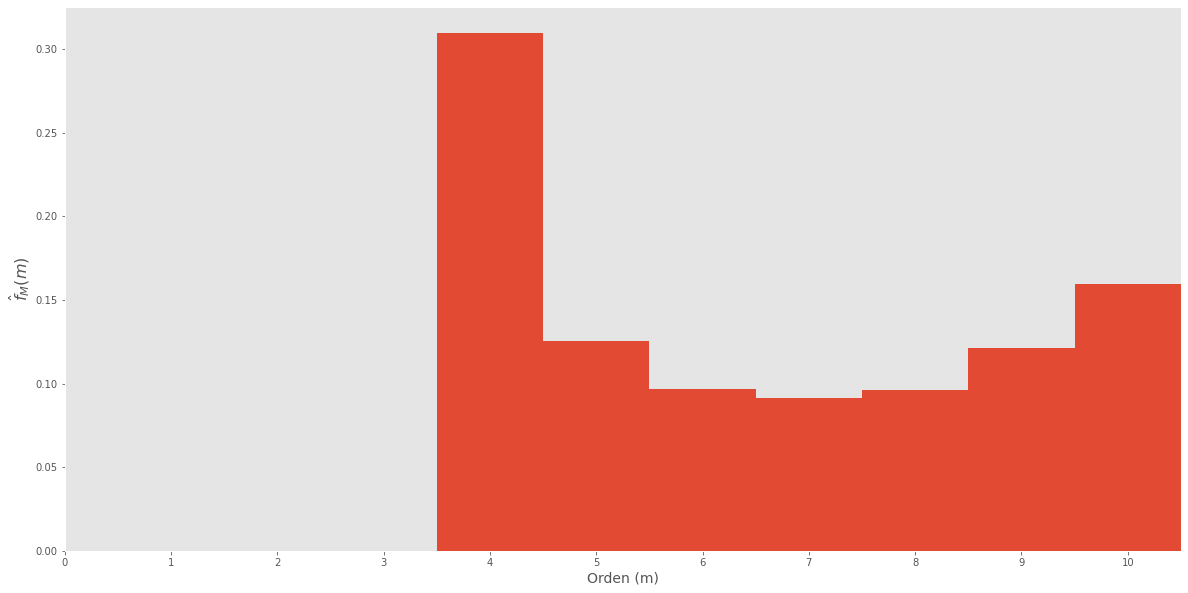

In [15]:
#Ejercicio 4 cell 4/4
plt.figure(figsize=(20,10))
plt.hist(ordenes_vec,density=True, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.xlim([0,10.5])
plt.xticks(np.arange(11))

plt.xlabel("Orden (m)",fontsize=14)
plt.ylabel(r"$\hat{f}_M(m)$",fontsize=16)
plt.grid(which='both')

In [22]:
#Ejercicio 5 cell 1/2
### 5) Aplicación a un proceso con modelo desconocido.

# Se obtiene un modelo AR de la señal mediante MV y Akaike
# Se buscan ordenes 0<m<21
# Comparar PSD de AKAIKE vs WELCH

from numpy import genfromtxt
z = genfromtxt('Ej4.csv')

N = len(z)


A_mv = np.zeros((20,20))
VAR_mv = np.zeros(20)
for orden in range(1,21):
    A_mv[orden-1,:orden],VAR_mv[orden-1] = modelo_mv(z,orden)

akaike_vec = np.zeros(20)
for orden in range(1,21):
    akaike_vec[orden-1] = metrica_akaike(orden,obtener_var_mv(orden,VAR_mv))

orden = np.where(akaike_vec == np.amin(akaike_vec))[0] + 1

w,H_akaike = sig.freqz([VAR_mv[13]], np.concatenate(([1],-A_mv[13,0:14])), worN=2501)

w_welch, H_z_welch = sig.welch(z, nperseg=250, noverlap=125, nfft=5000, fs=2*np.pi)

print(orden)

print((A_mv[13,:], VAR_mv[13]))
    

[14]
(array([-1.75681233, -1.20557411,  0.04723353,  0.58859629,  0.37655045,
        0.13048882,  0.09494184,  0.01055724, -0.1778741 , -0.25783015,
       -0.11945585,  0.05106708,  0.09102144,  0.03232747,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ]), 0.9789839054157148)


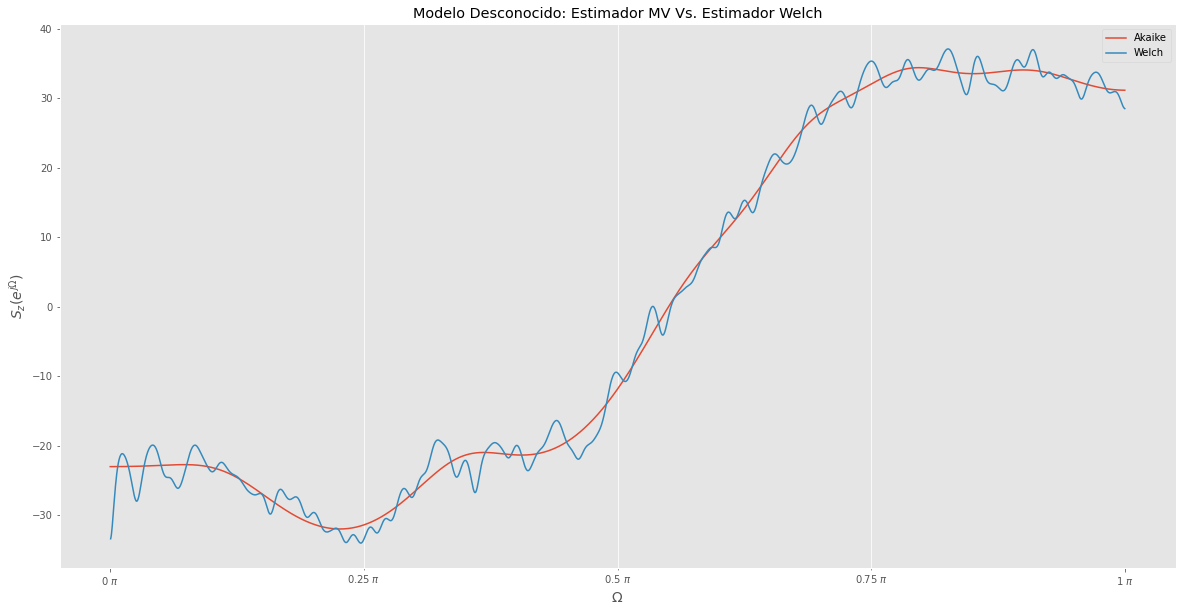

In [17]:
#Ejercicio 5 cell 2/2
plt.figure(figsize=(20,10))
plt.plot(w/np.pi,20*np.log(np.abs(H_akaike)))
plt.plot(w_welch[1:len(w_welch)-1]/np.pi,10*np.log(np.pi*np.abs(H_z_welch)[1:len(w_welch)-1]))
plt.grid(which='both')


ax = plt.gca()
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.xaxis.set_minor_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_minor_locator(tck.MultipleLocator(base=0.25))

plt.title("Modelo Desconocido: Estimador MV Vs. Estimador Welch")
plt.xlabel(r"$\Omega$",fontsize=14)
plt.ylabel(r"$S_z(e^{j\Omega})$",fontsize=14)
plt.legend(["Akaike","Welch"])

In [18]:
#Extra

#encontramos zpk de la transferencia

[z, p, konst] = sig.tf2zpk([1, -1.3817, 1.5632, -0.8843, 0.4096], [1, 0.3544, 0.3508, 0.1736, 0.2401])
print(z,p)

[0.125156+0.79015796j 0.125156-0.79015796j 0.565694+0.56566482j
 0.565694-0.56566482j] [ 0.31778647+0.62368046j  0.31778647-0.62368046j -0.49498647+0.49499783j
 -0.49498647-0.49499783j]
